<a href="https://colab.research.google.com/github/Ethan-code-1/project_chd/blob/main/our_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ! git clone https://github.com/Ethan-code-1/project_chd

In [1]:
! git clone https://github.com/Ethan-code-1/project_chd

Cloning into 'project_chd'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 30 (delta 9), reused 5 (delta 4), pack-reused 17
Receiving objects: 100% (30/30), 647.53 KiB | 8.75 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("./project_chd/fhs_train.csv")

In [4]:
df.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [5]:
df.shape

(3180, 17)

In [6]:
df.describe()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3180.000000,3180.000000,3180.000000,3095.000000,3180.000000,3156.000000,3143.000000,3180.000000,3180.000000,3180.000000,3141.000000,3180.000000,3180.000000,3165.000000,3180.000000,2895.000000,3180.000000
mean,2129.740881,0.433019,49.633962,1.957027,0.490881,8.970532,0.029590,0.006604,0.321069,0.026101,236.600764,132.784748,83.117767,25.888117,75.942138,81.833506,0.153145
std,1231.779357,0.495571,8.557596,1.011135,0.499995,12.013704,0.169479,0.081008,0.466961,0.159460,44.847411,22.433267,12.009212,4.130475,12.050504,23.625357,0.360184
min,1.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,1062.750000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.100000,68.000000,71.000000,0.000000
50%,2137.500000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,129.000000,82.000000,25.490000,75.000000,78.000000,0.000000
75%,3209.250000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.125000,90.000000,28.140000,83.000000,87.000000,0.000000
max,4240.000000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,140.000000,394.000000,1.000000


In [ ]:
na_counts = df.isna().sum()
print(na_counts)

Making correlation matrix to see relationship between variables. Also conducted external research to find some variables that are commonly associated with the response which include:
1. Age
2. Sex
3. Smoking Status
4. High blood Pressure
5. High Cholesterol


In [8]:
corr_matrix = df.corr()
#print(corr_matrix)

resp_matrix = corr_matrix['TenYearCHD'].sort_values()
print(resp_matrix)

education         -0.052668
Unnamed: 0        -0.019496
currentSmoker      0.001644
heartRate          0.023205
cigsPerDay         0.047712
prevalentStroke    0.062357
BMI                0.072830
BPMeds             0.088135
sex                0.097138
totChol            0.099704
diabetes           0.105644
glucose            0.126485
diaBP              0.133094
prevalentHyp       0.163910
sysBP              0.205898
age                0.225568
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64


Education seems to not be very important, so will impute those observations:

In [9]:
education_mean = df['education'].mean()
print(education_mean)

#Mean is essentially 2, so impute all missing values
df['education'].fillna(2, inplace = True)

1.95702746365105


CIGs per Day handling of Na's

In [10]:
resp_matrix = corr_matrix['cigsPerDay'].sort_values()
print(resp_matrix)

#Seems like age, whether the person is a smoker, and sex has the most to do with it

age               -0.201243
BMI               -0.095727
sysBP             -0.091574
prevalentHyp      -0.067209
glucose           -0.064437
diaBP             -0.050735
BPMeds            -0.047041
diabetes          -0.034708
prevalentStroke   -0.030623
totChol           -0.015547
Unnamed: 0         0.005077
education          0.005721
TenYearCHD         0.047712
heartRate          0.080058
sex                0.327893
currentSmoker      0.766473
cigsPerDay         1.000000
Name: cigsPerDay, dtype: float64


In [ ]:
cigs_mean = df['cigsPerDay'].mean()
cigs_median = df['cigsPerDay'].median()

print(cigs_mean, cigs_median)

8.970532319391635 0.0


It seems like if people smoke, they tend to smoke more. But because most people do not smoke, the median is 0. To address this, I will iterate through the table and if t

In [11]:
for index, row in df.iterrows():
    if pd.isnull(row['cigsPerDay']):

        if row['currentSmoker'] == 0:
            df.at[index, 'cigsPerDay'] = 0
        else:
            df.at[index, 'cigsPerDay'] = 9

Looking at BP Meds: So few missing values, lower predictablity than diaBP, and happens so rarely. Impute with rounded mean of 0

In [12]:
resp_matrix = corr_matrix['BPMeds'].sort_values()
print(resp_matrix)

currentSmoker     -0.051624
cigsPerDay        -0.047041
sex               -0.043688
education         -0.013907
heartRate         -0.005829
Unnamed: 0         0.011981
glucose            0.028597
diabetes           0.053874
totChol            0.073698
TenYearCHD         0.088135
BMI                0.091004
age                0.114807
prevalentStroke    0.127704
diaBP              0.200810
sysBP              0.252585
prevalentHyp       0.254690
BPMeds             1.000000
Name: BPMeds, dtype: float64


In [13]:
print(df['BPMeds'].mean())

0.02958956411072224


In [ ]:
df['BPMeds'].fillna(0, inplace = True)

Dealing with total Chol

In [14]:
df['totChol'].median()
df['totChol'].fillna(233.0, inplace = True)

Dealing with BMI

In [39]:
df['BMI'].mean()
df['BMI'].fillna(25.89, inplace = True)

Based on Matrix above it seems the glucose does have some predictive power. But in the describe table it also appears the variablity is high so imputing with the mean may not be the best. As a proportion of total observations it is still low enough that those rows can be removed, especially because it is believed the values are missing at random

In [41]:
(df['BPMeds'].mean())
df['BPMeds'].fillna(0.03006993006993007, inplace = True)


Final check to ensure dataset is clean:

In [42]:
na_counts = df.isna().sum()
print(na_counts)

Unnamed: 0         0
sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


Cleaned data above. Trees Model:
To look at prediction for Ten_year_CHD.

[Text(0.5, 0.875, 'x[2] <= 48.5\ngini = 0.264\nsamples = 2895\nvalue = [2442, 453]'),
 Text(0.25, 0.625, 'x[15] <= 232.5\ngini = 0.148\nsamples = 1420\nvalue = [1306, 114]'),
 Text(0.125, 0.375, 'x[10] <= 398.5\ngini = 0.143\nsamples = 1415\nvalue = [1305, 110]'),
 Text(0.0625, 0.125, 'gini = 0.14\nsamples = 1412\nvalue = [1305, 107]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.375, 'x[0] <= 3834.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.625, 'x[15] <= 122.5\ngini = 0.354\nsamples = 1475\nvalue = [1136, 339]'),
 Text(0.625, 0.375, 'x[11] <= 142.75\ngini = 0.341\nsamples = 1428\nvalue = [1117, 311]'),
 Text(0.5625, 0.125, 'gini = 0.283\nsamples = 875\nvalue = [726, 149]'),
 Text(0.6875, 0.125, 'gini = 0.414\nsamples = 553\nvalue = [391, 162]'),
 Text(0.875, 0.375, 'x[13] <= 34.85\ngini = 0.482\nsamples 

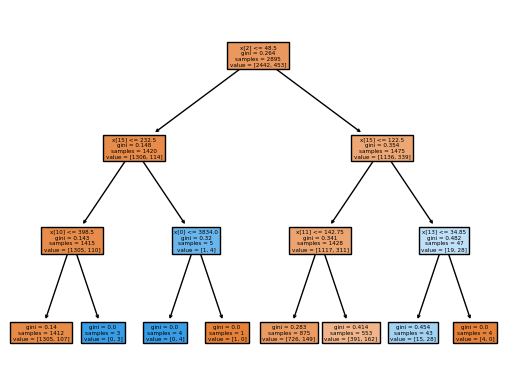

In [78]:
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier

# Process data:
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis=1)

# Fit decision tree:
cart = DecisionTreeClassifier() # Create a classifier object
cart = DecisionTreeClassifier(max_depth=3) #Keeping the tree from over fitting
cart = cart.fit(X, y) # Fit the classifier

# Visualize results:
plot_tree(cart,filled=True)

In [60]:
#Checking predictor based off model index #
#X [2]
print(df.columns[2])
#X [15]
print(df.columns[15])
#X [10]
print(df.columns[10])
#X [5]
print(df.columns[5])
#X [11]
print(df.columns[11])

age
glucose
totChol
cigsPerDay
sysBP


**Significant predictors:**

  

- Age - We can see that Age is the most significant starting predictor. With
those under 48.5 representing 83% of the split.
- Glucose - Is another significant precdictor with the model stating that if someone has high glucose they are likely in risk.
- TotChol - represents cholesteral and additionally further predicts risk
- CigsPerDay - Another significant predictor

Overall, it shows with just this few information the model can predict the likelyhood of somone having a CHD risk.






In [90]:
#Running the model on test data to see the fit.

#Import and clean test
df_test = pd.read_csv("./project_chd/fhs_test.csv")

education_mean = df_test['education'].mean()
#Mean is essentially 2, so impute all missing values
df_test['education'].fillna(2, inplace = True)

for index, row in df_test.iterrows():
    if pd.isnull(row['cigsPerDay']):

        if row['currentSmoker'] == 0:
            df_test.at[index, 'cigsPerDay'] = 0
        else:
            df_test.at[index, 'cigsPerDay'] = 9

df_test['BPMeds'].fillna(0.03, inplace = True)
df_test['heartRate'].fillna(60, inplace = True)
df_test['totChol'].fillna(233.0, inplace = True)
df_test['BMI'].fillna(25.89, inplace = True)
df_test['glucose'].fillna(82, inplace = True)

na_counts = df_test.isna().sum()
print(na_counts)
df_test.info()


Unnamed: 0         0
sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1060 non-null   int64  
 1   sex              1060 non-null   int64  
 2   age              1060 non-null   int64  
 3   education        1060 non-null   float64
 4   currentSmoker    1060 non-null   int64  
 5   cigsPerDay       1060 non-null   float64
 6   BPMeds           1060 non-null   float64
 7   prevalentStroke  1060 non-null   int64  
 8   prevalentHyp     1060 non-null   int64  
 9   diabetes    

Accuracy:  0.8443396226415094 



col_0,0,1
TenYearCHD,,
0,888,15
1,150,7


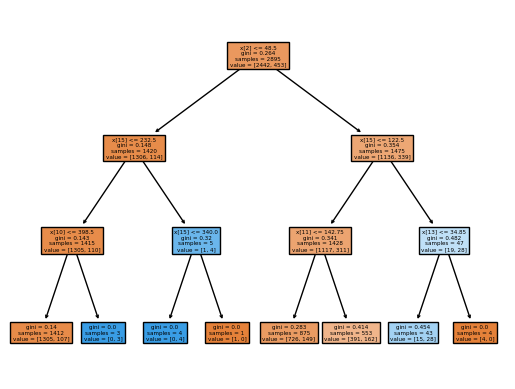

In [91]:
#Running the model again with the test data set cleaned, to get accuracy (R2)

from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier

# Process data:
y_train = df['TenYearCHD']
X_train = df.drop(['TenYearCHD'], axis=1)
y_test = df_test['TenYearCHD']
X_test = df_test.drop(['TenYearCHD'], axis = 1)

# Fit decision tree:
cart = DecisionTreeClassifier() # Create a classifier object
cart = DecisionTreeClassifier(max_depth=3) #Keeping the tree from over fitting
cart = cart.fit(X_train, y_train) # Fit the classifier

# Visualize results:
plot_tree(cart,filled=True)

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
#acc = np.trace(tab)/np.sum(np.sum(tab,axis=0)) # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

With these few predictors we can see an accuracy of guessing CHD of 84%.